# DataThink Final Model Building

## Import Packages Here

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Datasets

In [ ]:
main_raw = pd.read_csv("/content/drive/MyDrive/datathink/Main_BusinessDataBBB_02022024.csv")
demoinfo = pd.read_csv("/content/drive/MyDrive/datathink/DemographicInfo.csv")
donot = pd.read_csv("/content/drive/MyDrive/datathink/DoNotSolicit.csv")
out = pd.read_csv('/content/drive/MyDrive/datathink/OutOfBusiness.csv')

In [ ]:
# Drop all Out of Business
out_of_business_ids = out['Business ID'].unique()
filtered_main = main_raw[~main_raw['Business ID'].isin(out_of_business_ids)]
deduplicated_main = filtered_main.drop_duplicates(subset='Business ID', keep='first')
dropped_main = deduplicated_main.drop(columns =['URL','Facebook','Email','Address 2','Country'])
main_clean_1 = dropped_main
main_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142729 entries, 0 to 150886
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Business ID        142729 non-null  int64  
 1   Business           142729 non-null  object 
 2   AB?                142729 non-null  bool   
 3   Established        43078 non-null   object 
 4   State Established  142618 non-null  object 
 5   TOB                142125 non-null  object 
 6   Address            142016 non-null  object 
 7   City               142599 non-null  object 
 8   State              142589 non-null  object 
 9   Zip                142510 non-null  object 
 10  County             142391 non-null  object 
 11  Region             136208 non-null  object 
 12  Rating             142729 non-null  object 
 13  Annual Revenue     92217 non-null   float64
 14  Employees          142729 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(11)
memory usag

## Classifying The TOB Into Larger Overarching Categories

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk

# Load data
TOB_Analysis = main_clean_1[['Business ID', 'TOB']]
TOB_Analysis['TOB'] = TOB_Analysis['TOB'].astype(str)

# Preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

TOB_Analysis['processed'] = TOB_Analysis['TOB'].apply(preprocess_text)

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(TOB_Analysis['processed']);

from sklearn.cluster import KMeans

# Number of clusters
n_clusters = 100
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Add cluster labels to the dataframe
TOB_Analysis['cluster'] = clusters

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-5-0382bdbea8dc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOB_Analysis['TOB'] = TOB_Analysis['TOB'].astype(str)
<ipython-input-5-0382bdbea8dc>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOB_Analysis['processed'] = TOB_Analysis['TOB'].apply(preprocess_t

In [ ]:
# # Review clusters
# for i in range(n_clusters):
#     print(f"Cluster {i}:")
#     print(TOB_Analysis[TOB_Analysis['cluster'] == i]['TOB'].unique()[:10])  # Display first 10 entries of each cluster

In [ ]:
cluster_names = {
    0: "Debt and Collections Services",
    1: "Painting and Coatings Industry",
    2: "Roofing Services",
    3: "Apartment and Rental Services",
    4: "Cleaning Services",
    5: "Business and Professional Services",
    6: "Automotive Dealerships and Services",
    7: "Moving, Storage, and Company Services",
    8: "Handyman Services",
    9: "Food and Dining Services",
    10: "Appliance Sales and Services",
    11: "Home Improvement and Services",
    12: "General Contracting and Engineering Services",
    13: "Automotive Services and Dealerships",
    14: "Health and Wellness Services",
    15: "Beauty and Personal Care Services",
    16: "Legal Services",
    17: "Electrical Services",
    18: "Consulting Services",
    19: "Maintenance and Repair Services",
    20: "Insurance Services",
    21: "Real Estate Services",
    22: "Jewelry Sales and Services",
    23: "Cleaning Services",
    24: "Landscape Services",
    25: "Dental Services",
    26: "Community and Recreational Centers",
    27: "Clothing and Apparel",
    28: "Construction and Building Services",
    29: "Medical Services and Supplies",
    30: "Hospitality and Hotel Services",
    31: "Property Management Services",
    32: "Retail and Shopping Services",
    33: "Plumbing Services",
    34: "Retail Stores and Services",
    35: "Design Services",
    36: "Pest Control Services",
    37: "Service Not Specified",
    38: "Removal Services",
    39: "Tax Services",
    40: "Sales and Marketing Services",
    41: "Air Conditioning and Heating Services",
    42: "Computer and Technology Services",
    43: "Floristry Services",
    44: "Transportation and Logistics Services",
    45: "Tree Services",
    46: "Supply Services",
    47: "Equipment Repair and Sales",
    48: "Garage Services",
    49: "Commercial Services and Contractors",
    50: "Customization Services",
    51: "Cleaning Services",
    52: "Healthcare and Personal Care Services",
    53: "Inspection Services",
    54: "Energy and Utility Services",
    55: "Locksmith Services",
    56: "Diverse Services",
    57: "Automotive and Industrial Parts",
    58: "Security and Systems Services",
    59: "Repair Services",
    60: "Towing Services",
    61: "HVAC Services",
    62: "Car Wash and Maintenance Services",
    63: "Accounting and Financial Services",
    64: "Electrical Services and Supplies",
    65: "Installation and Repair Services",
    66: "Architectural Services",
    67: "Hair Care Services",
    68: "Loan and Financial Services",
    69: "Credit and Financial Services",
    70: "Financial Advisory Services",
    71: "Chiropractic Services",
    72: "Catering and Event Services",
    73: "Building and Construction Services",
    74: "Marketing and Digital Services",
    75: "Trucking and Freight Services",
    76: "Merchandise and Warehouse Services",
    77: "Travel and Agency Services",
    78: "Management and Consulting Services",
    79: "Concrete and Construction Services",
    80: "Pet Care Services",
    81: "Telecommunication Services",
    82: "Personal Services",
    83: "Employment and Staffing Services",
    84: "Photography Services",
    85: "Retail Services",
    86: "Investment Services",
    87: "E-commerce Services",
    88: "Lawn Care and Maintenance Services",
    89: "Home Remodeling Services",
    90: "Office and Insurance Services",
    91: "Building and Construction Services",
    92: "Nail Salon Services",
    93: "Hospital and Healthcare Supplies",
    94: "Advertising and Marketing Services",
    95: "Real Estate and Title Services",
    96: "Used Car Sales",
    97: "Motorcycle Sales and Services",
    98: "Footwear Retail and Repair Services",
    99: "Auto Body Repair and Painting Services"
}

# Map the cluster numbers to category names
TOB_Analysis['category_name'] = TOB_Analysis['cluster'].map(cluster_names);
TOB_Analysis_clusterless = TOB_Analysis.drop(['TOB','processed','cluster'], axis=1);

<ipython-input-7-1eb20bd18cfe>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOB_Analysis['category_name'] = TOB_Analysis['cluster'].map(cluster_names);


## Join TOB with main

In [ ]:
main_TOB = pd.merge(main_clean_1, TOB_Analysis_clusterless, on = 'Business ID', how = 'left')
main_drop = main_TOB.dropna()
main_drop.count()
main_drop.to_csv('/content/drive/MyDrive/datathink/main_drop.csv')

## Joining Longitude and Latitude From Google Maps API

In [ ]:
location = pd.read_csv("/content/drive/MyDrive/datathink/main_address_all.csv")
main = pd.merge(main_drop, location[['Business ID', 'latitude', 'longitude']], on = 'Business ID', how = 'inner')
main = main.dropna()
main.info()
#main.to_csv('/content/drive/MyDrive/datathink/master_csv.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 26761 entries, 121 to 26891
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Business ID        26761 non-null  int64  
 1   Business           26761 non-null  object 
 2   AB?                26761 non-null  bool   
 3   Established        26761 non-null  object 
 4   State Established  26761 non-null  object 
 5   TOB                26761 non-null  object 
 6   Address            26761 non-null  object 
 7   City               26761 non-null  object 
 8   State              26761 non-null  object 
 9   Zip                26761 non-null  object 
 10  County             26761 non-null  object 
 11  Region             26761 non-null  object 
 12  Rating             26761 non-null  object 
 13  Annual Revenue     26761 non-null  float64
 14  Employees          26761 non-null  int64  
 15  category_name      26761 non-null  object 
 16  latitude           26761 

# Tree Based Learning

## Pre-processing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import pandas as pd

# Assuming 'main' is your DataFrame
# Convert "AB?" to binary format
main['AB?'] = main['AB?'].astype(int)

# Convert "Established" to the age of the business
# Convert to datetime
main['Established'] = pd.to_datetime(main['Established'], errors='coerce')
# Calculate age in years
main['Business Age'] = (datetime.now() - main['Established']).dt.days / 365.25

# Encode "Rating" and "Demographic" using LabelEncoder
label_encoder = LabelEncoder()
main['Rating Encoded'] = label_encoder.fit_transform(main['Rating'])
#main['Demographic Encoded'] = label_encoder.fit_transform(main['Demographic'])
main['category_name Encoded'] = label_encoder.fit_transform(main['category_name'])

# Select relevant columns for the prediction model
features_columns = ['Annual Revenue', 'Business Age', 'Rating Encoded', 'Employees', 'category_name Encoded', 'latitude', 'longitude',]
target_column = 'AB?'

# Drop rows with missing values in the selected features and target
main_clean = main.dropna(subset=features_columns + [target_column])

# Prepare the final dataset for model training
X = main_clean[features_columns]
y = main_clean[target_column]

# Display the first few rows to confirm the changes
X.head(), y.head()

(     Annual Revenue  Business Age  Rating Encoded  Employees  \
 121      36458265.0     60.832307               1        100   
 123        116151.0     18.280630              13          2   
 127         81000.0     17.043121               1          5   
 129         60000.0      4.021903               1          1   
 130         60000.0      5.744011               1          1   
 
      category_name Encoded   latitude  longitude  
 121                      1  33.786431 -84.383732  
 123                     29  33.449364 -84.324231  
 127                      2  33.853721 -84.212111  
 129                     60  33.738125 -84.387975  
 130                     79  33.541852 -84.421264  ,
 121    0
 123    0
 127    0
 129    0
 130    0
 Name: AB?, dtype: int64)

## Run the Model

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid to search
param_distributions = {
    'n_estimators': [500],
    'max_features': ['sqrt'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [True]
}

# Initialize the base classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize the RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf_classifier,
                                      param_distributions=param_distributions,
                                      n_iter=100,
                                      cv=3,
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1)

# Fit the random search model
rf_random_search.fit(X_train, y_train);

# Predict on the testing set using the best found parameters
y_pred = rf_random_search.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Best Parameters:", rf_random_search.best_params_)
print(accuracy)
print(class_report)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
0.9172997882675302
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      7259
           1       0.63      0.34      0.44       770

    accuracy                           0.92      8029
   macro avg       0.78      0.66      0.70      8029
weighted avg       0.90      0.92      0.91      8029



In [ ]:
from sklearn.model_selection import train_test_split
!pip install flaml
from flaml import AutoML
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize an AutoML instance
automl = AutoML()

# Specify the task and the metrics to optimize
settings = {
    "time_budget": 300,  # time budget in seconds
    "metric": 'accuracy',  # primary metrics can be log_loss, f1, etc.
    "task": 'classification',  # type of the task
    "log_file_name": "flaml.log",  # where the experiment logs are saved
    "estimator_list": ['rf'],  # focusing only on RandomForest
    "n_jobs": -1,  # use all CPUs
    "model_history": True,  # records the history of all models
}

# Fit the model
automl.fit(X_train=X_train, y_train=y_train, **settings)

# Predict on the testing set using the best model found
y_pred = automl.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Best hyperparameters found:", automl.best_config)
print("Best validation score:", automl.best_loss)
print("Best estimator:", automl.model.estimator)
print(accuracy)
print(class_report)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 2.7 MB/s eta 0:00:00
[flaml.automl.logger: 04-13 01:38:47] {1680} INFO - task = classification
[flaml.automl.logger: 04-13 01:38:47] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 04-13 01:38:47] {1789} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-13 01:38:47] {1901} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl.logger: 04-13 01:38:47] {2219} INFO - iteration 0, current learner rf
[flaml.automl.logger: 04-13 01:38:48] {2345} INFO - Estimated sufficient time budget=3715s. Estimated necessary time budget=4s.
[flaml.automl.logger: 04-13 01:38:48] {2392} INFO -  at 0.4s,	estimator rf's best error=0.0945,	best estimator rf's best error=0.0945
[flaml.automl.logger: 04-13 01:38:48] {2219} INFO - iteration 1, current learner rf
[flaml.automl.logger: 04-13 01:38:48] {2392} INFO -  at 0.8s,	estimator rf's best error=0.0832,	best estimator rf's best error=0.0832
[flaml.automl.logger: 04

## Graph Feature Importance

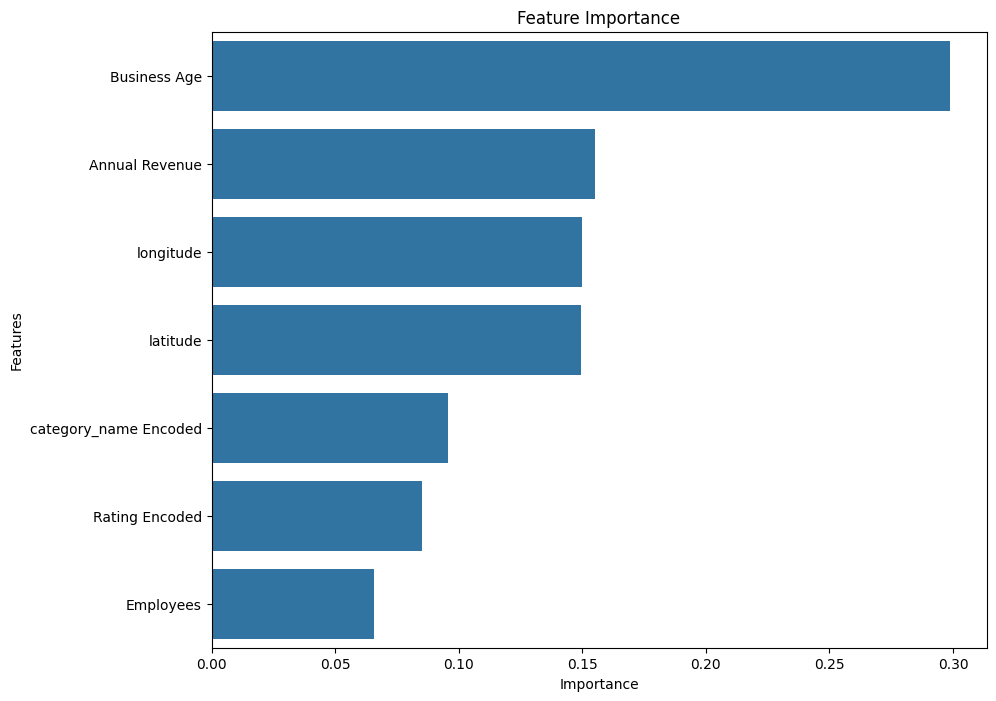

In [ ]:
# Extract the best model from the random search
best_model = rf_random_search.best_estimator_

# Get the feature importances
importances = best_model.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Prepare labels by sorting them according to the same order
labels = [X.columns[i] for i in sorted_indices]

# Creating the plot
plt.figure(figsize=(10, 8))
sns.barplot(x=importances[sorted_indices], y=labels)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Actual No predicted Yes
##P(Actual = No | Predict = Yes)

In [ ]:
# Step 1: Filter the main dataset to find instances where AB? is "no"
# Assuming `main` is a pandas DataFrame and AB? values are encoded as 0 for "no"
no_subset = main[main['AB?'] == 0]

# Prepare this subset for prediction (excluding the target column)
X_no_subset = no_subset[features_columns]

# Step 2: Make predictions on this subset
y_pred_no_subset = rf_random_search.predict(X_no_subset)

# Step 3: Identify instances where model predicts "yes" (assuming "yes" is encoded as 1)
predicted_yes_actual_no_indices = X_no_subset[y_pred_no_subset == 1].index

# Extract these instances from the original dataset
predicted_yes_actual_no = main.loc[predicted_yes_actual_no_indices]

In [ ]:
predicted_yes_actual_no

,Business ID,Business,AB?,Established,State Established,TOB,Address,City,State,Zip,...,Region,Rating,Annual Revenue,Employees,category_name,latitude,longitude,Business Age,Rating Encoded,category_name Encoded
212,91833180,4Loves Hotshot,0,2022-07-26,GA,Transportation Services,1505 Sugarplum Pl SW,Conyers,GA,30094,...,Not Assigned,A-,70000.0,1,Transportation and Logistics Services,33.632092,-84.047201,1.716632,2,91
649,91832219,A1 web design Studio,0,2021-08-28,GA,Web Design,115 East Main Street,Buford,GA,30518,...,Not Assigned,A,55000.0,1,Design Services,34.121431,-84.003593,2.625599,0,28
973,91830313,Ace's Rock Chip Repair,0,2022-12-18,GA,Windshield Repair,8260 Creekridge Cir,Riverdale,GA,30296,...,Not Assigned,A-,5000.0,1,Repair Services,33.530243,-84.427873,1.319644,2,80
1113,91820868,ADS Technical Services,0,2021-04-02,GA,Digital Marketing,1441 Woodmont Ln NW # 1255,Atlanta,GA,30318,...,Not Assigned,A+,180000.0,2,Marketing and Digital Services,33.803769,-84.435042,3.030801,1,63
1447,28130684,"AL' Taxx, LLC",0,2019-04-08,GA,Home Improvement,5943 Sutcliff Sq,Lithonia,GA,30058,...,Not Assigned,A+,25000.0,2,Home Improvement and Services,33.707103,-84.143653,5.015743,1,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25813,28131308,"Vime Home Solutions, LLC",0,2019-03-01,GA,Appliances,3565 Austell Rd SW Ste 1045,Marietta,GA,30008,...,Not Assigned,A+,200000.0,2,Appliance Sales and Services,33.865742,-84.592031,5.119781,1,4
26110,91820215,"We Do Roofing and Siding, LLC",0,2020-11-13,GA,Roofing Contractors,3416 Stanford Cir,Lawrenceville,GA,30044,...,Not Assigned,A+,50000.0,1,Roofing Services,33.912967,-84.085175,3.414100,1,84
26492,28137106,"Wise Restoration, LLC",0,2018-11-02,GA,Home Improvement,3935 Rutgers Dr SW,Atlanta,GA,30331,...,Not Assigned,A+,100000.0,1,Home Improvement and Services,33.761265,-84.516505,5.445585,1,47
26667,91821050,"Wynn Street, LLC",0,2021-05-17,GA,Vacation Rentals,"5100 Welcome All Rd Sw, B13",Atlanta,GA,30349,...,Not Assigned,A,40000.0,1,Diverse Services,33.614708,-84.523857,2.907598,0,29


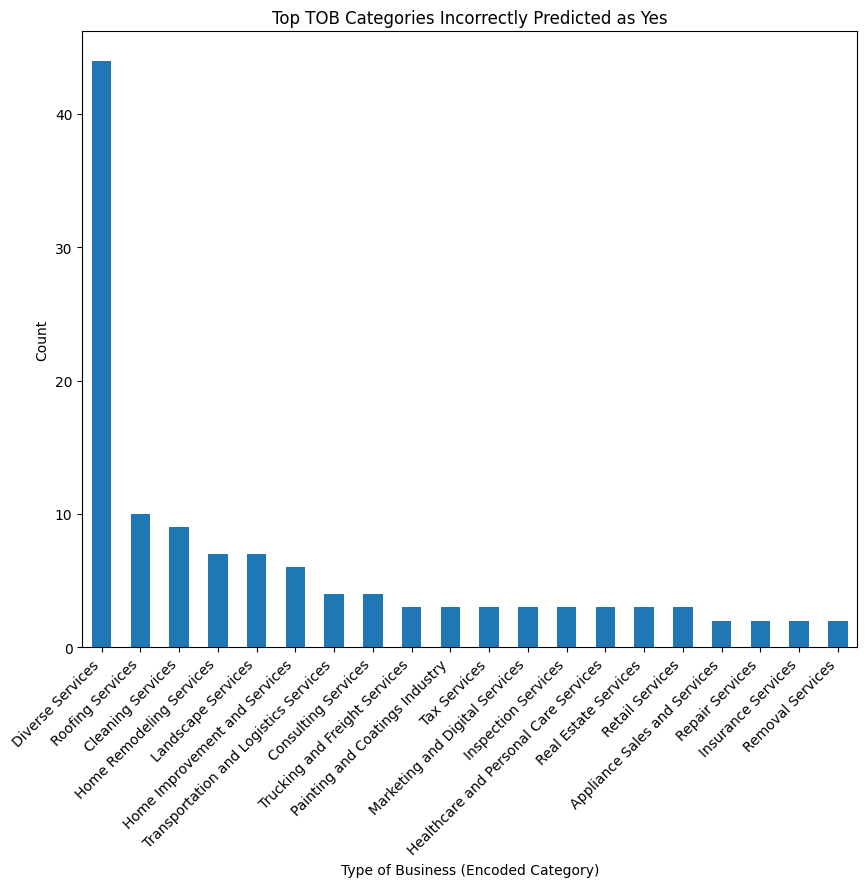

In [ ]:
category_counts = predicted_yes_actual_no['category_name'].value_counts()

# Select the top N categories you want to visualize, let's say top 20 for this example
top_n = 20
top_categories = category_counts.head(top_n)

# Create a bar plot
plt.figure(figsize=(10, 8))
top_categories.plot(kind='bar')
plt.xlabel('Type of Business (Encoded Category)')
plt.ylabel('Count')
plt.title('Top TOB Categories Incorrectly Predicted as Yes')
plt.xticks(rotation=45, ha="right") # Rotate category names for better readability

# Show plot
plt.show()

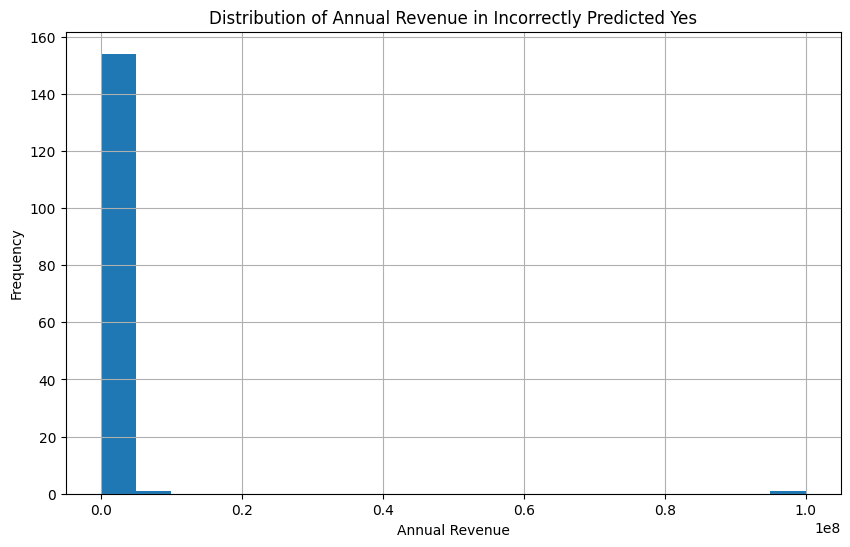

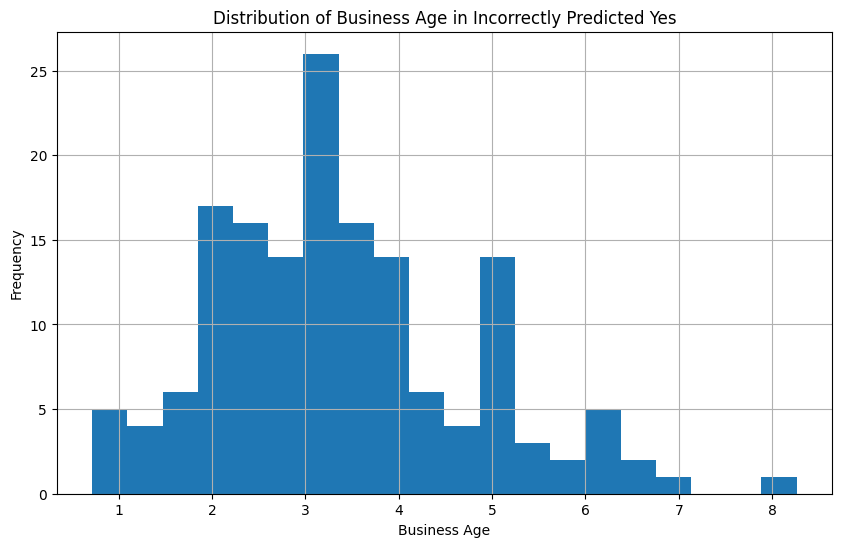

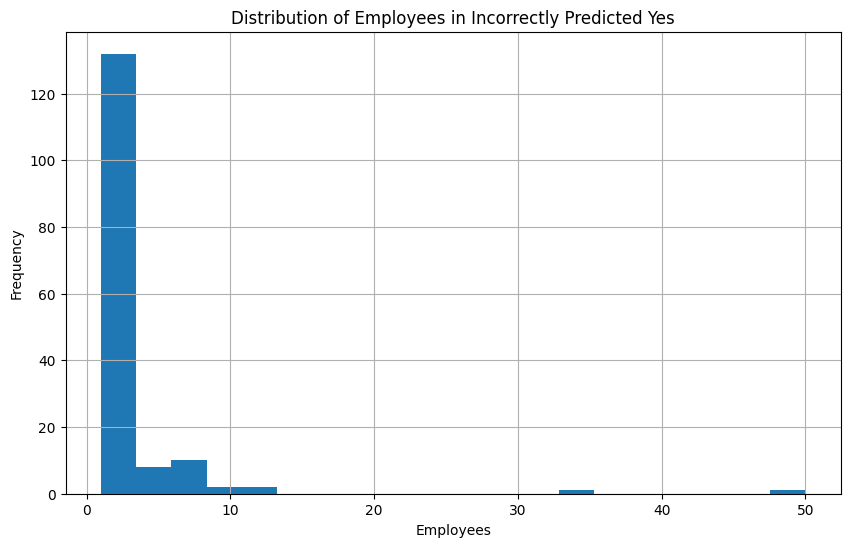

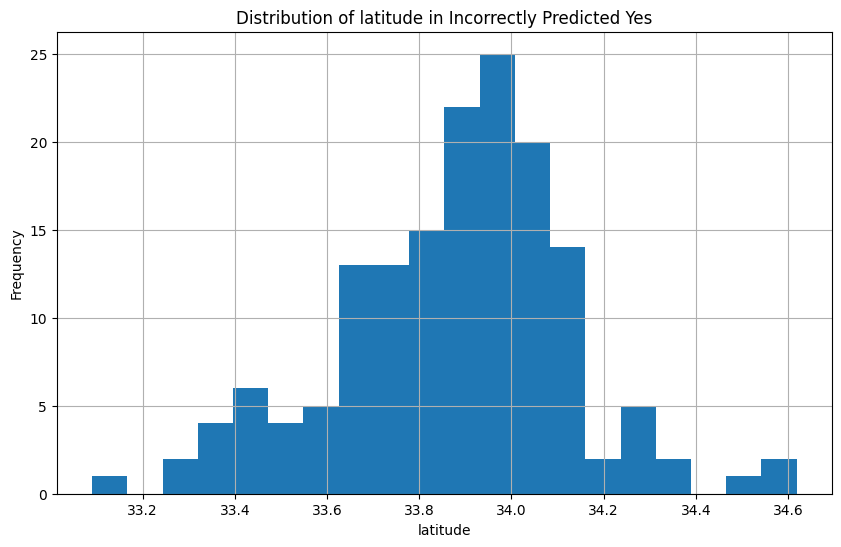

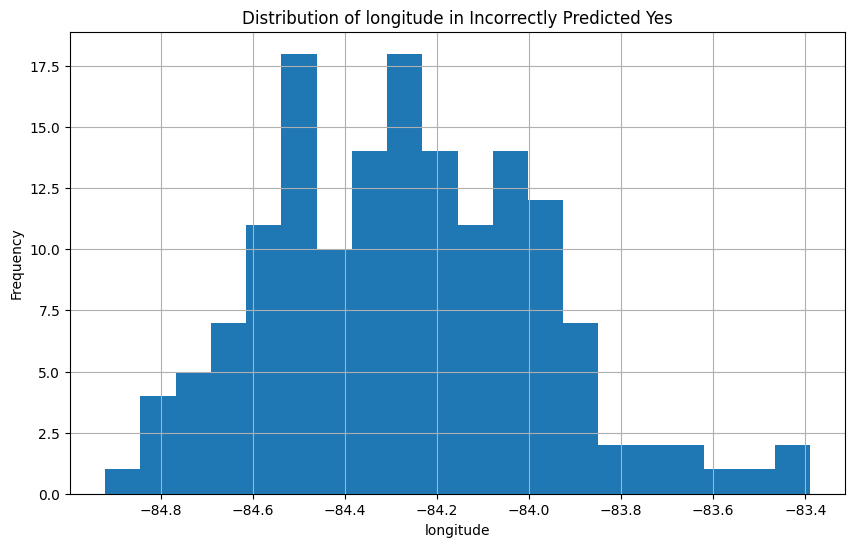

In [ ]:
numerical_columns = ['Annual Revenue', 'Business Age', 'Employees', 'latitude', 'longitude']

for column in numerical_columns:
    # Create a histogram for each numerical column
    plt.figure(figsize=(10, 6))
    predicted_yes_actual_no[column].hist(bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column} in Incorrectly Predicted Yes')
    plt.show()